In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.formula.api  as smf
import statsmodels.api as sm
import hvplot.pandas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.utils import resample

In [85]:
walkable_cities = pd.read_csv("walkable-cities.csv")

#uses the loc method to select the subset of rows and columns where the column names are not duplicated. 
walkable_cities = walkable_cities.loc[:,~walkable_cities.columns.duplicated()]
#removes the specified columns from the walkable_cities dataframe
walkable_cities.drop(walkable_cities.columns[[4,5,6,7,11]], axis=1, inplace=True)

In [86]:
# Set the maximum number of rows and columns displayed
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Identify all NA values in the dataframe
na_values = walkable_cities.isna().sum()

# Print the resulting dataframe
display(na_values)

place_code                                            0
city                                                  0
state                                                 0
pop_estimate_2021                                     0
geo_code                                              4
land_area_sqkm                                        4
pop_per_km2                                           4
median_age                                          196
male                                                196
female                                              196
white_alone                                           5
black_or_african_american_alone                       5
american_indian_and_alaska_native_alone               5
asian_alone                                           5
native_hawaiian_and_other_pacific_islander_alone      5
some_other_race_alone                                 5
two_or_more_races                                     5
hispanic_or_latino                              

In [87]:
walkable_cities.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,760.000000,7.600000e+02,7.560000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,727.000000,727.000000,727.000000,711.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,733.000000,733.000000,760.000000,760.000000,392.000000,392.000000,392.000000,392.000000,392.000000,563.000000,563.000000,564.000000,564.000000,727.000000,564.000000,518.000000,681.000000,633.000000,633.000000
mean,42201.003947,1.646429e+05,2.451419e+06,135.344888,1589.308126,36.554787,0.492196,0.508244,0.530158,0.136474,0.010493,0.082841,0.002794,0.114198,0.121619,0.247203,16.091816,22.160316,16.813411,29.640366,63.776723,5.912311,9.669532,81.740096,5.808872,71.852476,85.620253,68.686726,5.922558,43.091678,36.957221,14.563618,63.510591,19.193329,10.319326,14.422283,29.804993,2.807497,22.557359,72.440371,14.361279,31.499656,9.835144,33.107153,2.842847,10.194223,0.497485,0.005581,41.485526,46.298684,73.461990,2.677041,2.746939,0.647194,18.683418,0.382859,97922.424512,37995.865248,73858.675532,38843.456671,0.135641,6.892085,47.157122,0.004210,0.025443
std,24175.783004,3.924743e+05,1.704521e+06,186.608511,1505.860211,4.354124,0.018344,0.017905,0.195627,0.153452,0.010476,0.107579,0.006175,0.108583,0.062234,0.205923,6.837126,3.107948,2.260885,3.786599,3.813131,0.633356,0.906589,2.511802,0.804584,4.604071,2.332350,6.368350,1.259170,6.783988,6.250192,3.496685,6.198783,3.092191,1.798349,3.359495,2.100245,0.334807,4.340178,3.874187,1.434712,5.274307,1.591837,3.330289,0.442021,2.556524,0.336419,0.004845,16.236795,12.495227,12.821877,4.037735,2.473717,1.060421,9.771837,0.049541,33448.610008,13202.716289,26481.199768,6538.581192,0.061697,2.587433,17.362578,0.003196,0.012229
min,0.000000,5.010400e+04,1.030760e+05,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,0.001181,0.001917,0.000075,0.007337,0.024205,0.019868,5.600000,16.200000,8.700000,20.750000,53.050000,4.200000,7.800000,71.950000,4.300000,64.050000,78.550000,54.900000,3.750000,29.950000,24.450000,6.500000,42.550000,12.500000,6.300000,8.250000,23.650000,2.200000,12.350000,60.350000,10.350000,17.350000,6.250000,23.500000,2.050000,5.450000,0.022447,0.000384,0.000000,12.000000,21.600000,0.000000,0.200000,0.000000,2.500000,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,21000.000000,6.490600e+04,6.745655e+05,49.981347,797.451711,33.900000,0.480277,0.497261,0.398436,0.030277,0.004162,0.023772,0.000479,0.035492,0.077712,0.089025,11.275000,19.750000,15.600000,26.300000,60.350000,5.450000,9.000000,80.275000,5.150000,68.150000,84.150000,62.450000,5.100000,38.600000,32.400000,11.750000,59.650000,16.700000,9.200000,11.900000,27.950000,2.550000,19.600000,69.450000,13.350000,28.300000,8.600000,31.000000,2.500000,8.150000,0.326561,0.002713,31.000000,38.000000,67.950000,0.600000,1.275000,0.100000,11.750000,0.352608,75498

In [ ]:
# Correlations

top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
top_neg_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]

In [89]:
#Top possitive correlations
top_pos_corr_walk

pop_per_km2               0.717293
bike_score                0.669675
public_transit_commute    0.624452
living_wage               0.456153
walk_commute              0.412196
some_other_race_alone     0.377455
unemployment_rate         0.319987
bike_commute              0.294994
hispanic_or_latino        0.282338
violent_crime             0.244624
Name: walk_score, dtype: float64

## Multiple linear regression analysis 

To examine the relationship between the dependent variable 'walk_score' and a set of independent variables. 

In [90]:
# Create a multiple linear regression model with the dependent variable and the independent variables
model = smf.ols('walk_score ~ pop_estimate_2021 + land_area_sqkm + pop_per_km2 + median_age + male + female + white_alone +  black_or_african_american_alone + american_indian_and_alaska_native_alone + asian_alone +  native_hawaiian_and_other_pacific_islander_alone + some_other_race_alone + two_or_more_races + hispanic_or_latino + access2 + arthritis + binge + bphigh  + bpmed + cancer + casthma + cervical + chd + checkup + cholscreen + colon_screen + copd + corem + csmoking + dental + depression + diabetes +  ghlth + highchol + kidney + lpa + mammouse + mhlth + obesity + phlth + sleep + stroke + teethlost + cumulative_confirmed + cumulative_deceased + bike_score + drive_commute + public_transit_commute + walk_commute + bike_commute + work_from_home + households + mean_household_income + mean_income + median_household_income + living_wage + poverty + unemployment_rate + median_aqi + violent_crime + property_crime', data=walkable_cities).fit()

# Dependent variable - 'walk_score'
# Independent variables - pop_per_km2 + bike_score + public_transit_commute + living_wage + walk_commute + some_other_race_alone + unemployment_rate + bike_commute + hispanic_or_latino + violent_crime

# Print the summary of the model which gives information about the coefficients of the independent variables, their p-values, and other statistical measures.
print(model.summary())

# Define the null and alternate hypotheses 
null_hypothesis = "There is no relationship between walk_score and the independent variables"
alternate_hypothesis = "There is a relationship between walk_score and the independent variables"

# Perform the F-test  to determine if the overall model is statistically significant.
f_test = model.f_test(np.identity(len(model.params)))

# Print the p-value of the F-test
print(f"p-value = {f_test.pvalue:.4f}")

# Interpret the results
if f_test.pvalue < 0.05:
    print("Reject the null hypothesis")
    print(alternate_hypothesis)
else:
    print("Fail to reject the null hypothesis")
    print(null_hypothesis)

                            OLS Regression Results                            
Dep. Variable:             walk_score   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     30.23
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           6.75e-81
Time:                        15:36:15   Log-Likelihood:                -865.05
No. Observations:                 290   AIC:                             1854.
Df Residuals:                     228   BIC:                             2082.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 62, but rank is 60
  warnings.warn('covariance of constraints does not have full '


In [91]:
# Get the names of the features and their coefficients and p-values
features = model.params.index.tolist()[1:]
coefs = model.params.tolist()[1:]
p_values = model.pvalues.tolist()[1:]

# Combine the features, coefficients and p-values into a data frame
coef_df = pd.DataFrame({'feature': features, 'coef': coefs, 'p_value': p_values})

# Sort the data frame by p_value ascending
coef_df.sort_values(by='p_value', ascending=True, inplace=True)

# Print the sorted data frame
print(coef_df)

                                             feature        coef       p_value
2                                        pop_per_km2    0.005103  2.392198e-16
45                                        bike_score    0.357495  3.843968e-10
6                                        white_alone  127.930491  2.108376e-04
9                                        asian_alone  127.183419  3.410729e-04
11                             some_other_race_alone  126.282565  1.158265e-03
7                    black_or_african_american_alone  111.654919  1.424160e-03
49                                      bike_commute   -1.731876  2.121769e-03
3                                         median_age    0.447248  3.585367e-03
12                                 two_or_more_races  105.237475  7.245897e-03
56                                           poverty   39.315475  1.336067e-02
16                                             binge    0.622310  2.105951e-02
28                                          csmoking

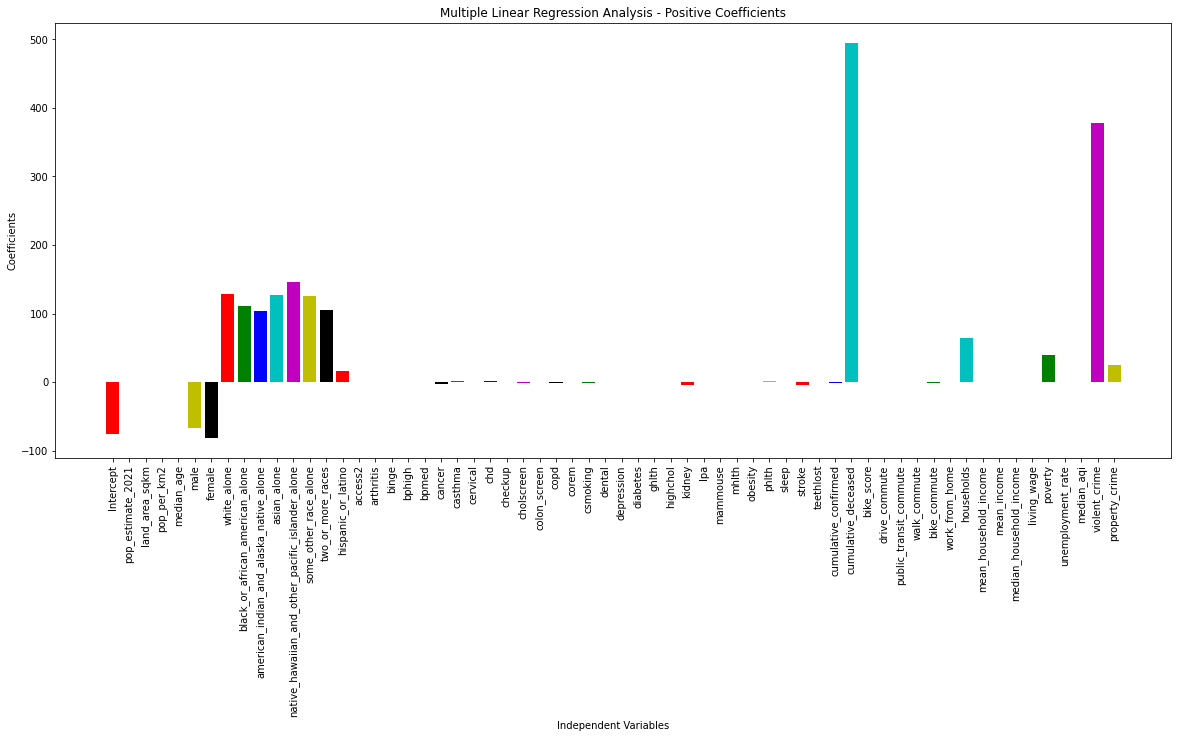

In [92]:
# Extract the coefficients from the model
coefficients = model.params

# Statement to get only plot the positive coefficients
positive_coef = coefficients[coefficients > 0]

# Set the figure size
plt.figure(figsize=(20,8))

# Create a bar plot of the coefficients
plt.bar(coefficients.index, coefficients.values, color=['r','g','b','c','m','y','k'])

# Add labels to the axes
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Multiple Linear Regression Analysis - Positive Coefficients')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Linear Regression

New dataframe (data) with numeric features

In [93]:
data = walkable_cities[['pop_estimate_2021',
       'land_area_sqkm', 'pop_per_km2', 'median_age', 'male', 'female',
       'white_alone', 'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'walk_score', 'bike_score', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']]

In [94]:
data.head()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,78564,157.084761,500.137630,27.8,0.483186,0.516662,0.622652,0.178313,0.003029,0.094369,0.000484,0.020327,0.050010,0.046064,14.65,26.45,16.05,37.05,69.45,5.75,9.65,82.95,6.15,76.55,86.75,72.85,7.10,41.70,43.35,16.20,66.55,25.10,11.10,17.05,31.80,2.9,24.30,74.10,16.00,36.00,10.60,35.85,3.10,11.85,0.482257,0.004340,28,38,NaN,NaN,NaN,NaN,NaN,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,197575,380.801025,518.840515,37.2,0.479291,0.514812,0.238942,0.694906,0.003821,0.016576,0.000623,0.027129,0.033987,0.046939,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.2,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,33,31,83.6,0.9,2.8,0.1,12.0,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,57804,140.785624,410.581694,NaN,NaN,NaN,0.574182,0.232527,0.007491,0.009186,0.000969,0.103505,0.074459,0.156910,17.65,31.25,15.40,37.40,69.45,6.70,9.75,83.15,7.60,75.40,86.95,71.25,8.95,39.55,44.60,20.35,61.00,26.40,12.50,19.45,33.80,3.2,28.60,73.80,16.80,40.15,12.25,37.85,3.60,14.00,0.625683,0.008961,25,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,71175,232.650562,305.930918,40.5,0.473565,0.527952,0.568964,0.335736,0.004004,0.016031,0.000660,0.020288,0.052870,0.043990,17.15,29.85,13.40,43.45,70.35,6.65,10.10,83.85,7.55,77.65,87.65,74.35,8.70,44.15,35.90,20.10,58.45,26.35,12.70,20.65,33.95,3.4,32.65,71.25,16.85,39.10,12.30,39.90,3.95,14.20,0.362487,0.007109,22,31,89.1,0.0,1.3,0.1,7.9,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,92589,124.490626,743.742746,38.9,0.504066,0.495923,0.687598,0.168713,0.002743,0.064036,0.000216,0.020953,0.055925,0.050805,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.2,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,17,12,NaN,NaN,NaN,NaN,NaN,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758


### Scaling:
 The data is scaled using the StandardScaler() function. This function normalizes the data by subtracting the mean and dividing by the standard deviation. This is done to ensure that all features are on the same scale, which is important for PCA.

In [95]:
# Scaling - normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Data imputation: 
An imputer object is created with strategy='mean' or 'median'. It fits and transforms the data using the imputer, which replaces the missing values with the mean or median of the data.

In [96]:
# Create an imputer object with strategy='mean' or 'median'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data using the imputer
data_scaled = imputer.fit_transform(data_scaled)

### PCA - Principal component analysis

PCA (Principal component analysis): This is an unsupervised machine learning algorithm that helps in dimensionality reduction by identifying patterns in the data and transforming the data into new features, which are called principal components.

In [97]:
#Initialize the PCA model and specify the number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data: The PCA model is fitted to the scaled and imputed data.
pca.fit(data_scaled)

# Apply the dimensionality reduction to the data: The data is transformed into the 2 principal components using the transform() function.
data_reduced = pca.transform(data_scaled)

### Splitting

Split the data into training and test sets: The transformed data is split into training and test sets, with the test size set to 20% of the data.

In [98]:
# Split the data into training and test sets
y = data['walk_score']
X_train, X_test, y_train, y_test = train_test_split(data_reduced, y, test_size=0.2, random_state=0)


### To calculate the P>value, you can use statsmodels

In [99]:
# Add a constant to the data for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Fit the regression model to the training data
reg_with_constant = sm.OLS(y_train, X_train_with_constant).fit()

# Get the summary of the regression model
print(reg_with_constant.summary())

                            OLS Regression Results                            
Dep. Variable:             walk_score   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     45.92
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.72e-19
Time:                        15:50:04   Log-Likelihood:                -2510.5
No. Observations:                 608   AIC:                             5027.
Df Residuals:                     605   BIC:                             5040.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1818      0.611     67.376      0.0

### Linear Regression Model

Initialize the linear regression model: A LinearRegression() object is created.

In [100]:
# Initialize the linear regression model
reg = LinearRegression()

# Fit the model to the training data: The linear regression model is fitted to the training data.
reg.fit(X_train, y_train)

# Predict on the test set: The model is used to make predictions on the test set.
y_pred = reg.predict(X_test)

# Calculate the score (R-squared): The R-squared score is calculated to evaluate the performance of the linear regression model.  It ranges from 0 to 1, with 1 indicating a perfect fit.
score = reg.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.16389011485367688


In [101]:
# Get the feature names: The names of the original features are stored in the feature_names variable.
feature_names = data.columns.values

# Get the principal components in terms of the original features: The components_ attribute is used to get the principal components in terms of the original features.
components = pca.components_

# Print the names of the features for each principal component with their feature_coefficient sorted by feature_coefficient
for i, component in enumerate(components):
    print(f"Principal Component {i+1}:")
    for j, feature_coefficient in enumerate(component):
        print(f"{feature_names[j]}: {feature_coefficient}")
    print("\n")
    feature_coefficient = sorted(enumerate(component),key = lambda x: x[1])
    for j, feature_coefficient in feature_coefficient:
        print(f"{feature_names[j]}: {feature_coefficient}")
    print("\n")

Principal Component 1:
pop_estimate_2021: 0.0035844000994558344
land_area_sqkm: 0.0541843166980335
pop_per_km2: -0.06972973971221516
median_age: -0.029307548829794965
male: -0.04759964037136559
female: 0.049041877286491994
white_alone: -0.009627133759745691
black_or_african_american_alone: 0.09736878107282397
american_indian_and_alaska_native_alone: -0.005904092509686887
asian_alone: -0.13019048178417375
native_hawaiian_and_other_pacific_islander_alone: -0.03563295544275599
some_other_race_alone: -0.010967400303344843
two_or_more_races: 0.026473209883308403
hispanic_or_latino: 0.017345293518636517
access2: 0.14339495763824636
arthritis: 0.17429837442796384
binge: -0.047171232773418115
bphigh: 0.2111056170219487
bpmed: 0.14597145607029088
cancer: 0.04293047310680371
casthma: 0.0915373972053518
cervical: -0.051598737189649094
chd: 0.2268979626582476
checkup: 0.11014995835082424
cholscreen: -0.05495003220954862
colon_screen: -0.0027798907860959615
copd: 0.2198443879980193
corem: -0.063579

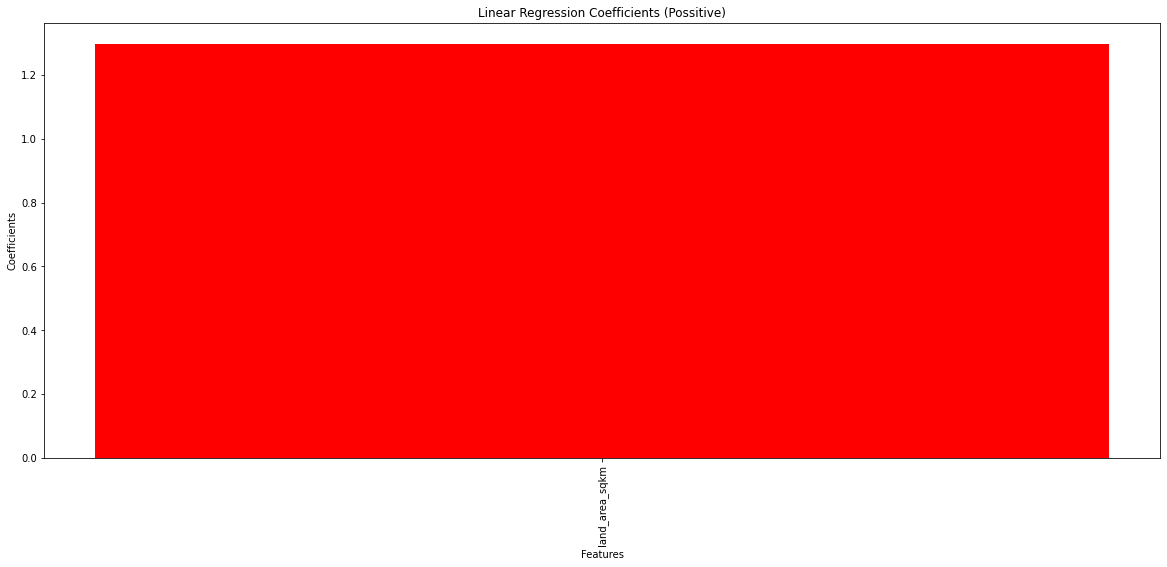

In [103]:
# Get the linear regression coefficients
coefs = reg.coef_

# Only select the positive coefficients
positive_coefs_1 = [coef for coef in coefs  if coef >= 0]

# Get the feature names of the positive coefficients
positive_feature_names = [feature_names[i] for i, coef in enumerate(coefs) if coef >= 0]

# Set the figure size
plt.figure(figsize=(20,8))

# Create a bar plot of the positive coefficients
plt.bar(positive_feature_names, positive_coefs_1, color=['r','g','b','c','m','y','k'])
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title('Linear Regression Coefficients (Possitive)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Lasso Linear Regression with L1 regularization

In [104]:
data.describe()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,7.600000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,727.000000,727.000000,727.000000,711.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,733.000000,733.000000,760.000000,760.000000,392.000000,392.000000,392.000000,392.000000,392.000000,563.000000,563.000000,564.000000,564.000000,727.000000,564.000000,518.000000,681.000000,633.000000,633.000000
mean,1.646429e+05,135.344888,1589.308126,36.554787,0.492196,0.508244,0.530158,0.136474,0.010493,0.082841,0.002794,0.114198,0.121619,0.247203,16.091816,22.160316,16.813411,29.640366,63.776723,5.912311,9.669532,81.740096,5.808872,71.852476,85.620253,68.686726,5.922558,43.091678,36.957221,14.563618,63.510591,19.193329,10.319326,14.422283,29.804993,2.807497,22.557359,72.440371,14.361279,31.499656,9.835144,33.107153,2.842847,10.194223,0.497485,0.005581,41.485526,46.298684,73.461990,2.677041,2.746939,0.647194,18.683418,0.382859,97922.424512,37995.865248,73858.675532,38843.456671,0.135641,6.892085,47.157122,0.004210,0.025443
std,3.924743e+05,186.608511,1505.860211,4.354124,0.018344,0.017905,0.195627,0.153452,0.010476,0.107579,0.006175,0.108583,0.062234,0.205923,6.837126,3.107948,2.260885,3.786599,3.813131,0.633356,0.906589,2.511802,0.804584,4.604071,2.332350,6.368350,1.259170,6.783988,6.250192,3.496685,6.198783,3.092191,1.798349,3.359495,2.100245,0.334807,4.340178,3.874187,1.434712,5.274307,1.591837,3.330289,0.442021,2.556524,0.336419,0.004845,16.236795,12.495227,12.821877,4.037735,2.473717,1.060421,9.771837,0.049541,33448.610008,13202.716289,26481.199768,6538.581192,0.061697,2.587433,17.362578,0.003196,0.012229
min,5.010400e+04,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,0.001181,0.001917,0.000075,0.007337,0.024205,0.019868,5.600000,16.200000,8.700000,20.750000,53.050000,4.200000,7.800000,71.950000,4.300000,64.050000,78.550000,54.900000,3.750000,29.950000,24.450000,6.500000,42.550000,12.500000,6.300000,8.250000,23.650000,2.200000,12.350000,60.350000,10.350000,17.350000,6.250000,23.500000,2.050000,5.450000,0.022447,0.000384,0.000000,12.000000,21.600000,0.000000,0.200000,0.000000,2.500000,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,6.490600e+04,49.981347,797.451711,33.900000,0.480277,0.497261,0.398436,0.030277,0.004162,0.023772,0.000479,0.035492,0.077712,0.089025,11.275000,19.750000,15.600000,26.300000,60.350000,5.450000,9.000000,80.275000,5.150000,68.150000,84.150000,62.450000,5.100000,38.600000,32.400000,11.750000,59.650000,16.700000,9.200000,11.900000,27.950000,2.550000,19.600000,69.450000,13.350000,28.300000,8.600000,31.000000,2.500000,8.150000,0.326561,0.002713,31.000000,38.000000,67.950000,0.600000,1.275000,0.100000,11.750000,0.352608,75498.000000,28768.500000,55021.250000,34211.500000,0.087817,5.100000,38.000000,0.001950,0.016792
50%,8.838150e+04,83.929773,1179.498942,36.550000,0.

### Bootstrap sample of the data_scaled dataset. 

The n_samples parameter is set to 2000, which means that the bootstrap sample will have 2000 rows. The replace parameter is set to True, which means that the same data point can be sampled multiple times. The random_state parameter is set to 42, which ensures that the sample is reproducible.

In [105]:
# Bootstrap the data_scaled to create 2000 rows
bootstrap = resample(data, n_samples=2000, replace=True, random_state=42)

# Convert the bootstrap sample to a dataframe
df = pd.DataFrame(bootstrap, columns=data.columns)

# Display the bootstrapped dataframe
print('Bootstrapped data:')
print(df)

Bootstrapped data:
     pop_estimate_2021  land_area_sqkm  pop_per_km2  median_age      male  \
102             106941      111.216608   961.556029        32.9  0.504493   
435             112684      101.381374  1111.486218        34.5  0.477273   
270              82341       48.007290  1715.177007        46.3  0.482129   
106              85742       43.288926  1980.691320        42.1  0.499778   
71              111645       32.138031  3473.921598        40.3  0.492346   
..                 ...             ...          ...         ...       ...   
525             210606       92.634700  2273.510898        34.6  0.477147   
333              59459       36.876383  1612.386985         NaN       NaN   
1               197575      380.801025   518.840515        37.2  0.479291   
374              85617      151.411679   565.458362        37.0  0.517958   
292              62043       65.916407   941.237589         NaN       NaN   

       female  white_alone  black_or_african_american_al

In [106]:
df.describe()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,2.000000e+03,1990.000000,1990.000000,1487.000000,1487.000000,1487.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1912.000000,1912.000000,1912.000000,1862.000000,1862.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1862.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.00000,1912.000000,1912.000000,1862.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1930.000000,1930.000000,2000.000000,2000.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1486.000000,1486.000000,1487.000000,1487.000000,1912.000000,1487.000000,1367.000000,1797.000000,1674.000000,1674.000000
mean,1.715765e+05,139.845023,1600.832028,36.517283,0.492247,0.508159,0.532226,0.135549,0.010745,0.081887,0.002788,0.114195,0.120904,0.245799,16.137291,22.065978,16.853243,29.615414,63.721348,5.908760,9.639331,81.667992,5.793279,71.704707,85.538453,68.499869,5.902877,43.103478,36.930753,14.515010,63.490717,19.17262,10.268593,14.364566,29.790843,2.799268,22.492469,72.239304,14.321182,31.304707,9.795764,33.045816,2.834414,10.184100,0.486024,0.005443,41.485500,46.801000,72.759690,2.759884,2.785271,0.707364,19.252035,0.382213,99557.551144,38525.863484,74904.199731,38912.589435,0.135629,6.734016,47.095715,0.004153,0.025205
std,4.815398e+05,199.111469,1629.521537,4.564221,0.017529,0.017147,0.190657,0.151900,0.011273,0.102219,0.006096,0.110662,0.058933,0.204602,6.683851,2.974588,2.275323,3.797785,3.835409,0.629728,0.860682,2.447362,0.794635,4.542981,2.359949,6.325620,1.244800,6.619485,6.199818,3.475387,6.076947,3.06011,1.782968,3.288625,2.049539,0.326189,4.298688,3.961651,1.440304,5.349009,1.558025,3.280508,0.434197,2.557078,0.353025,0.005059,16.581926,12.798684,13.580318,4.231490,2.538976,1.227689,10.301186,0.049111,35533.816571,13908.735165,27856.086248,6526.395554,0.061864,2.587334,17.856511,0.003140,0.011755
min,5.010400e+04,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,0.001181,0.001917,0.000075,0.007337,0.024205,0.019868,5.600000,16.200000,8.700000,21.400000,53.050000,4.200000,7.800000,71.950000,4.300000,64.050000,78.550000,54.900000,3.750000,29.950000,24.450000,6.500000,42.550000,12.50000,6.300000,8.250000,25.400000,2.200000,12.850000,60.350000,10.350000,17.350000,6.250000,23.500000,2.050000,5.450000,0.088055,0.000754,0.000000,12.000000,21.600000,0.000000,0.200000,0.000000,2.500000,0.245462,49626.000000,17236.000000,32217.000000,29818.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,6.503500e+04,50.093079,758.141337,33.750000,0.480445,0.496990,0.406675,0.030024,0.004226,0.023848,0.000507,0.035649,0.079582,0.091017,11.500000,19.750000,15.600000,26.300000,60.350000,5.450000,9.000000,80.250000,5.150000,67.850000,84.100000,62.450000,5.100000,38.900000,32.400000,11.750000,59.650000,16.70000,9.137500,11.900000,28.000000,2.550000,19.650000,69.350000,13.250000,28.200000,8.550000,31.000000,2.500000,8.150000,0.316616,0.002682,31.000000,38.000000,66.900000,0.600000,1.200000,0.100000,11.900000,0.351569,75771.000000,28961.500000,55446.000000,34196.000000,0.088501,4.900000,38.000000,0.001928,0.

### Interpolate method from pandas

The method set to "nearest" and the xis parameter set to 0. The inplace parameter is set to True, which means that the interpolation is done on the original dataframe.

In [107]:
# Do the original interpolation
df.interpolate(method='nearest', xis=0, inplace=True)

# Display result
print ('Interpolated data:')
print (df)
print ()

Interpolated data:
     pop_estimate_2021  land_area_sqkm  pop_per_km2  median_age      male  \
102             106941      111.216608   961.556029        32.9  0.504493   
435             112684      101.381374  1111.486218        34.5  0.477273   
270              82341       48.007290  1715.177007        46.3  0.482129   
106              85742       43.288926  1980.691320        42.1  0.499778   
71              111645       32.138031  3473.921598        40.3  0.492346   
..                 ...             ...          ...         ...       ...   
525             210606       92.634700  2273.510898        34.6  0.477147   
333              59459       36.876383  1612.386985        36.8  0.527263   
1               197575      380.801025   518.840515        37.2  0.479291   
374              85617      151.411679   565.458362        37.0  0.517958   
292              62043       65.916407   941.237589        43.1  0.497253   

       female  white_alone  black_or_african_american_al

This function takes in a variable "x" and an arbitrary number of parameters represented by the *params argument. The function then creates a variable "y" that is initialized to 0. A loop is then used to iterate through the parameters and add the product of each parameter and the corresponding power of x to the "y" variable. The function returns "y" at the end.

In [108]:
# Function to curve fit to the data
def func(x, *params):
    y = 0
    for i in range(len(params)):
        y += params[i] * (x ** i)
    return y

### Fitting process

A variable called "guess" is then defined, which is a list of 1's with a length equal to the number of columns in the dataframe. This is used as an initial parameter guess for the curve fitting process.

In [ ]:
# Initial parameter guess, just to kick off the optimization
guess = [1] * len(df.columns)

# Create copy of df to remove NaNs for curve fitting
fit_data = df.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_data.columns:
    # Get x & y
    x = fit_data.index.astype(float).values
    y = fit_data[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 102 to 292
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pop_estimate_2021                                 2000 non-null   int64  
 1   land_area_sqkm                                    2000 non-null   float64
 2   pop_per_km2                                       2000 non-null   float64
 3   median_age                                        1991 non-null   float64
 4   male                                              1991 non-null   float64
 5   female                                            1991 non-null   float64
 6   white_alone                                       2000 non-null   float64
 7   black_or_african_american_alone                   2000 non-null   float64
 8   american_indian_and_alaska_native_alone           2000 non-null   float64
 9   asian_alone       

### Extrapolate

In [113]:
# Extrapolate each column
for col in df.columns:
    # Get the index values for NaNs in the column
    x = df[pd.isnull(df[col])].index.astype(float).values
    # Iterate through each index value and set the value to the extrapolated result
    for idx in x:
        df.loc[idx, col] = func(idx, *col_params[col])

# Display result
print ('Extrapolated df:')
print (df)
print ()

print ('df was extrapolated with these column functions:')

Extrapolated df:
     pop_estimate_2021  land_area_sqkm  pop_per_km2  median_age      male  \
102             106941      111.216608   961.556029        32.9  0.504493   
435             112684      101.381374  1111.486218        34.5  0.477273   
270              82341       48.007290  1715.177007        46.3  0.482129   
106              85742       43.288926  1980.691320        42.1  0.499778   
71              111645       32.138031  3473.921598        40.3  0.492346   
..                 ...             ...          ...         ...       ...   
525             210606       92.634700  2273.510898        34.6  0.477147   
333              59459       36.876383  1612.386985        36.8  0.527263   
1               197575      380.801025   518.840515        37.2  0.479291   
374              85617      151.411679   565.458362        37.0  0.517958   
292              62043       65.916407   941.237589        43.1  0.497253   

       female  white_alone  black_or_african_american_alon

<ipython-input-108-672060720b92>:5: RuntimeWarning: overflow encountered in double_scalars
  y += params[i] * (x ** i)
<ipython-input-108-672060720b92>:5: RuntimeWarning: invalid value encountered in double_scalars
  y += params[i] * (x ** i)


Iterate through the number of parameters in the col_params dictionary and add the corresponding term for each parameter in the string that is being printed.

In [114]:
for col in col_params:
    terms = []
    for i in range(len(col_params[col])):
        terms.append("{:0.3e} x^{}".format(col_params[col][i], i))
    #print("f_{}(x) = {}".format(col, " + ".join(terms)))

In [115]:
# Define the numerical columns
list_numerical = df.columns.drop('walk_score')

# Define the features and target variable
X = df.drop(columns='walk_score')
y = df['walk_score']

# Split the df set into train and test set with the first 70% of the df for training and the remaining 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
497,109796,94.371261,1163.447419,39.7,0.517751,0.482176,0.581223,0.029737,0.015957,0.066660,0.009445,0.145524,0.139149,0.297552,15.75,22.75,19.95,27.45,62.05,6.10,9.80,80.65,6.25,68.55,84.20,68.50,6.30,41.85,31.00,17.25,64.55,19.20,8.90,14.55,32.35,2.75,20.65,70.20,15.45,26.85,10.70,32.85,2.75,10.70,0.279873,0.003174,52,83.9,1.7,1.6,0.0,11.2,0.395206,99038.0,39137.0,78778.0,34316.0,0.070349,7.7,49.0,0.005872,0.023194
215,123436,100.776151,1224.853289,39.7,0.490481,0.512703,0.813661,0.010872,0.010094,0.026005,0.000664,0.037493,0.109036,0.150977,11.45,21.75,18.95,22.55,56.80,6.30,9.20,84.35,4.75,65.65,86.35,72.85,4.65,47.35,46.00,11.80,68.55,18.30,6.85,9.65,27.25,2.35,14.15,71.25,12.65,24.05,7.85,26.05,2.25,7.60,0.457315,0.004842,50,71.8,0.7,0.5,0.0,26.2,0.410561,113079.0,46680.0,92647.0,42241.0,0.068254,4.5,47.0,0.002155,0.029505
539,298263,335.621779,888.687858,36.3,0.457643,0.542313,0.401354,0.421018,0.005847,0.050854,0.000490,0.056574,0.066451,0.101987,17.60,22.55,13.75,33.25,67.45,6.10,9.30,85.40,6.15,80.15,87.40,73.00,5.95,49.65,40.10,16.45,61.90,19.90,10.65,13.50,31.20,3.05,22.05,75.30,13.75,35.60,9.70,34.05,3.25,11.20,0.294176,0.002930,32,79.4,1.9,1.7,0.1,14.6,0.415590,75155.0,32208.0,51825.0,34749.0,0.136970,6.4,40.0,0.008181,0.036860
103,64239,38.165702,1683.160446,32.9,0.504493,0.495469,0.697941,0.012671,0.004670,0.099550,0.001292,0.059715,0.125967,0.163608,12.55,19.70,15.60,25.60,61.15,5.50,9.00,81.55,5.10,65.30,86.70,62.40,5.10,39.45,31.35,10.40,66.90,15.10,9.60,13.30,30.80,2.60,20.75,67.85,12.65,23.00,9.15,31.90,2.45,7.75,0.226101,0.002645,31,87.6,0.5,1.2,0.0,8.2,0.256721,97560.0,26603.0,81052.0,51843.0,0.128089,7.8,49.0,0.000669,0.009449
476,508394,815.061344,623.749370,35.1,0.475771,0.524271,0.552691,0.260855,0.006336,0.031405,0.002952,0.055199,0.089964,0.119925,17.15,27.15,18.70,30.30,69.75,6.25,9.85,81.90,6.60,73.40,84.85,71.10,7.15,50.60,40.70,18.85,63.60,22.70,11.15,16.70,31.30,2.95,26.80,73.15,16.45,36.15,11.15,38.55,3.25,12.70,0.122575,0.001535,35,75.2,1.7,1.2,0.4,19.9,0.430808,83593.0,36456.0,63396.0,35762.0,0.131215,6.2,45.0,0.013964,0.037616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,80139,57.468900,1394.475969,34.4,0.458291,0.541746,0.789279,0.009197,0.004205,0.051136,0.010669,0.027964,0.074458,0.087261,13.75,20.60,13.20,26.15,57.20,5.65,10.90,78.55,4.95,69.85,81.55,74.25,4.55,50.60,36.80,9.15,71.05,24.05,9.25,11.20,27.20,2.55,17.45,67.40,15.00,30.05,8.50,29.95,2.40,8.10,0.401120,0.001893,44,65.9,1.9,0.4,0.0,28.5,0.318222,133229.0,42511.0,104170.0,36578.0,0.040555,2.5,52.0,0.000911,0.014026
551,189347,160.405166,1180.429563,39.5,0.482706,0.517273,0.550524,0.315933,0.002715,0.053304,0.000423,0.016150,0.066877,0.032723,11.70,26.60,15.90,32.70,69.05,6.60,10.35,81.45,7.00,75.45,84.70,71.60,8.15,44.90,34.10,21.15,63.75,23.75,11.25,15.25,27.90,2.95,24.85,70.65,16.20,34.10,10.25,34.90,3.30,12.80,0.479245,0.007120,43,83.1,1.9,2.1,0.1,11.2,0.448457,54788.0,25307.0,41628.0,32023.0,0.200890,8.2,40.0,0.009411,0.034688
42,407615,387.916575,1050

### Scaling

This code is performing feature scaling on the training and testing sets using the StandardScaler method from scikit-learn. The StandardScaler method calculates the mean and standard deviation of the features, and then standardizes them by subtracting the mean and dividing by the standard deviation.

In [116]:
# standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation.
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

X_train

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
497,-0.119352,-0.227867,-0.248988,0.705752,1.461398,-1.499709,0.229058,-0.691685,0.481593,-0.151414,1.031051,0.315567,0.328097,0.278276,-0.035498,0.227078,1.335295,-0.547119,-0.403473,0.289988,0.174443,-0.402695,0.595227,-0.706085,-0.534881,-0.040533,0.323208,-0.241860,-1.017082,0.800895,0.132524,-0.036285,-0.746800,0.102836,1.250668,-0.106989,-0.380560,-0.507359,0.788970,-0.804086,0.606167,-0.014449,-0.151522,0.232299,-0.584309,-0.436026,0.405198,0.750635,-0.154617,-0.403421,-0.628221,-0.732360,0.243983,0.031887,0.090428,0.180581,-0.709977,-1.101439,0.414507,0.162972,0.564662,-0.204694
215,-0.092049,-0.196709,-0.213524,0.705752,-0.126277,0.285364,1.460603,-0.818298,-0.050074,-0.550115,-0.338811,-0.684043,-0.197903,-0.453575,-0.693225,-0.108552,0.910076,-1.858432,-1.765055,0.613093,-0.526501,1.130310,-1.259476,-1.352402,0.367581,0.653440,-0.964494,0.581556,1.479948,-0.752601,0.783864,-0.325192,-1.937333,-1.413130,-1.189327,-1.361729,-1.869072,-0.243614,-1.154452,-1.326030,-1.221957,-2.093819,-1.324812,-0.990032,-0.092131,-0.112613,0.249138,-0.180148,-0.430086,-0.876991,-0.628221,0.722862,0.557045,0.443377,0.658057,0.700549,0.521741,-1.137105,-0.861517,0.043897,-0.619953,0.305470
539,0.257904,0.945771,-0.407670,-0.060544,-2.038100,2.016842,-0.723964,1.934425,-0.435238,-0.306419,-0.366084,-0.507486,-0.941763,-0.698183,0.247478,0.159952,-1.301065,1.005047,0.997012,0.289988,-0.409677,1.565352,0.471580,1.879182,0.808317,0.677370,0.050059,0.925894,0.497783,0.572859,-0.298988,0.188420,0.269508,-0.222014,0.700473,0.834066,-0.059958,0.773687,-0.390965,0.826988,-0.035280,0.352499,1.021768,0.429449,-0.544637,-0.483520,-1.155399,0.404476,-0.099523,-0.360369,-0.535198,-0.402510,0.659569,-0.668038,-0.430997,-0.829925,-0.642680,0.032922,-0.103878,-0.372866,1.300409,0.899985
103,-0.210544,-0.501297,0.051162,-0.826840,0.689517,-0.722370,0.847472,-0.806222,-0.541990,0.171141,-0.240877,-0.478430,0.097840,-0.390510,-0.524969,-0.796593,-0.514409,-1.042207,-0.636887,-0.679330,-0.760149,-0.029802,-0.826712,-1.430406,0.514493,-1.013690,-0.613303,-0.601168,-0.958818,-1.151664,0.515186,-1.352417,-0.340277,-0.283890,0.509101,-0.577517,-0.357660,-1.097644,-1.154452,-1.521759,-0.388075,-0.304949,-0.855496,-0.930887,-0.733459,-0.538740,-1.233428,1.035254,-0.485180,-0.575628,-0.628221,-1.023405,-2.579434,-0.011428,-0.852787,0.265836,2.014101,-0.118285,0.454383,0.162972,-1.093400,-1.315709
476,0.678526,3.278155,-0.560680,-0.331001,-0.982704,0.961784,0.077884,0.859480,-0.390941,-0.497163,0.018164,-0.520209,-0.531057,-0.608620,0.178646,1.703849,0.803771,0.215583,1.593514,0.532317,0.232855,0.115212,1.027991,0.374824,-0.262044,0.374255,0.986569,1.068120,0.597664,1.256967,-0.022169,1.087241,0.559882,0.768004,0.748316,0.520381,1.027801,0.233638,1.483048,0.929513,0.894819,1.728553,1.021768,1.020900,-1.020613,-0.753912,-0.921309,0.081394,-0.154617,-0.575628,-0.256131,0.111668,0.969833,-0.420750,-0.111324,-0.396112,-0.485237,-0.065061,-0.183629,-0.075178,3.143374,0.961128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Lasso Linear Regression with L1 regularization, using the X_train and y_train data.

In [117]:

# Create an imputer with mean strategy, which will replace any missing values in the data with the mean value of the column.
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train = imputer.fit_transform(X_train)

# Transform the test set
X_test = imputer.transform(X_test)

# Fit and train the Lasso model on the training data with alpha=1
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

# Print the R squared for the training and test sets

print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 74.82
R squared test set 74.36


### Calculate the mean squared error for the training and test sets

The code is calculating the mean squared error (MSE) for both the training and test sets. MSE is a measure of how well the model is able to predict the target variable (in this case, 'walk_score') based on the features. A lower MSE indicates a better fit of the model to the data.

In [118]:
# Training data

pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data

pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 67.6
MSE test set 74.24


### Plot the Lasso coefficients as a function of alpha

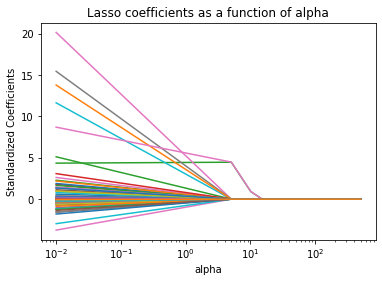

In [119]:

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

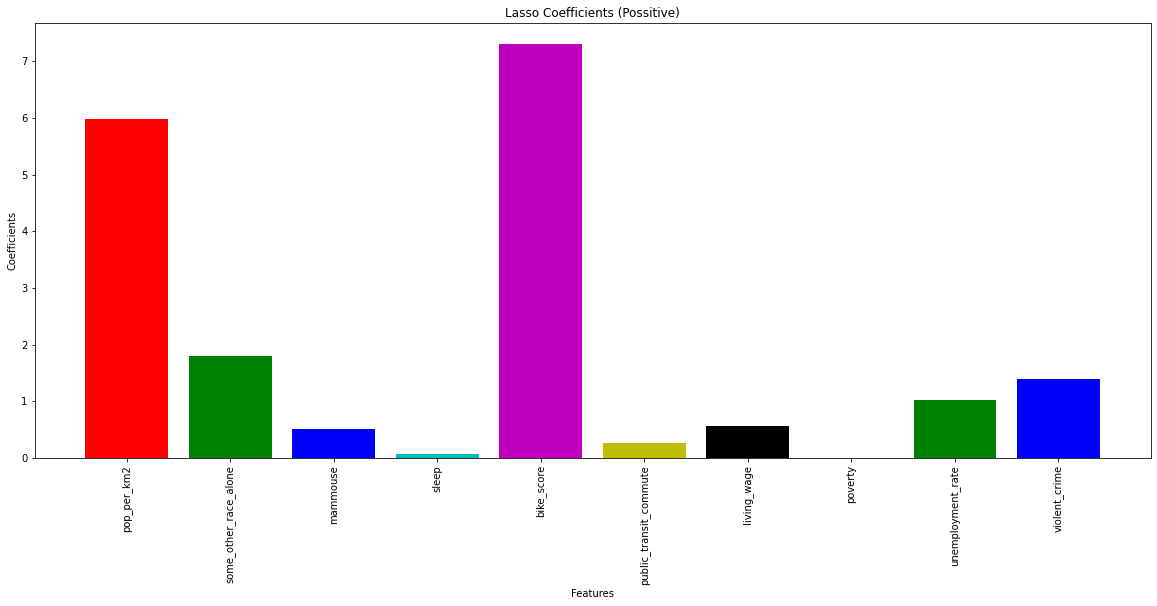

In [120]:
# Create a list of feature importance tuples for only positive coefficients
feature_importance = [(feature, coef) for feature, coef in zip(X.columns, reg.coef_) if coef > 0]

# Extract the features and coefficients into separate lists
features = [f[0] for f in feature_importance]
coefs = [f[1] for f in feature_importance]

# Set the figure size
plt.figure(figsize=(20,8))

# Create a bar plot of the feature importance with different colors for each feature
plt.bar(features, coefs, color=['r','g','b','c','m','y','k'])
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficients (Possitive)")
plt.xticks(rotation=90)
plt.show()

## LassoCV Linear Regression model

In [127]:
"""
LassoCV is a type of linear regression model that uses L1 regularization. LassoCV performs Lasso
regression with cross-validation.

The model is initialized with a cv value of 5, meaning that it will use 5-fold cross-validation when
training.

Random_state is set to 0 for reproducibility and max_iter is set to 10000 to increase the number of 
iterations for convergence.
"""
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# The best alpha value is chosen from the cross-validation process and used to create a new Lasso model
lasso_best = Lasso(alpha=model.alpha_)
#Fit this new Lasso model to the training data
lasso_best.fit(X_train, y_train)

# Create a list of feature importance tuples
feature_importance = list(zip(X.columns, lasso_best.coef_))

# Sort the feature importance list by coefficient in descending order
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Calculate R-squared and MSE
r2 = lasso_best.score(X_test, y_test)
y_pred = lasso_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print R-squared and MSE
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Print the sorted feature importance
for feature, coef in sorted_feature_importance:
    print(f"{feature}: {coef:.4f}")

R-squared: 0.8389
Mean Squared Error: 46.6291
white_alone: 19.4659
black_or_african_american_alone: 14.9013
some_other_race_alone: 13.4568
asian_alone: 11.2735
bike_score: 8.7046
two_or_more_races: 4.9227
pop_per_km2: 4.3644
teethlost: 3.0178
lpa: 2.6336
chd: 2.2274
sleep: 2.1890
casthma: 1.9110
hispanic_or_latino: 1.7146
households: 1.6700
living_wage: 1.4533
checkup: 1.4042
dental: 1.3748
violent_crime: 1.3588
cumulative_deceased: 1.1128
binge: 0.9824
unemployment_rate: 0.9784
bpmed: 0.9365
cancer: 0.7632
native_hawaiian_and_other_pacific_islander_alone: 0.5851
mammouse: 0.4066
bphigh: 0.3486
corew: 0.2777
mean_income: 0.1895
phlth: 0.1854
highchol: 0.1829
american_indian_and_alaska_native_alone: 0.1417
walk_commute: 0.1003
mhlth: 0.0231
median_age: 0.0000
depression: 0.0000
ghlth: -0.0000
mean_household_income: 0.0000
property_crime: -0.0369
male: -0.0679
pop_estimate_2021: -0.0880
cholscreen: -0.1250
corem: -0.2318
median_aqi: -0.2445
poverty: -0.2827
arthritis: -0.2998
cervical: -

c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.187e+01, tolerance: 3.759e+01
  model = cd_fast.enet_coordinate_descent(


In [122]:
### THIS IS ANOTHER WAY TO GET THE R-SQUARED
"""
# Print the sorted feature importance
for feature, coef in sorted_feature_importance:
    print(feature, coef)

# Evaluate the model's performance on the training and test sets by printing the R-squared score
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

# Print the mean squared error of the predictions on the test set
mean_squared_error(y_test, lasso_best.predict(X_test))
"""

R squared training set 84.2
R squared test set 83.89


46.62908506186946

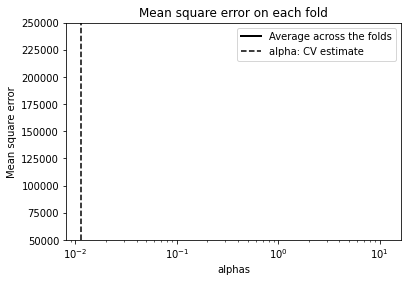

In [123]:
# Lasso path: plot results of cross-validation with mean squared error
plt.semilogx(model.alphas_, model.mse_path_, ":")
# Plot the average mean squared error across all folds for each value of alpha
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
# Add a vertical line to indicate the value of alpha chosen by the LassoCV
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

# Add legend and labels
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

# Set the y-axis limits
ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

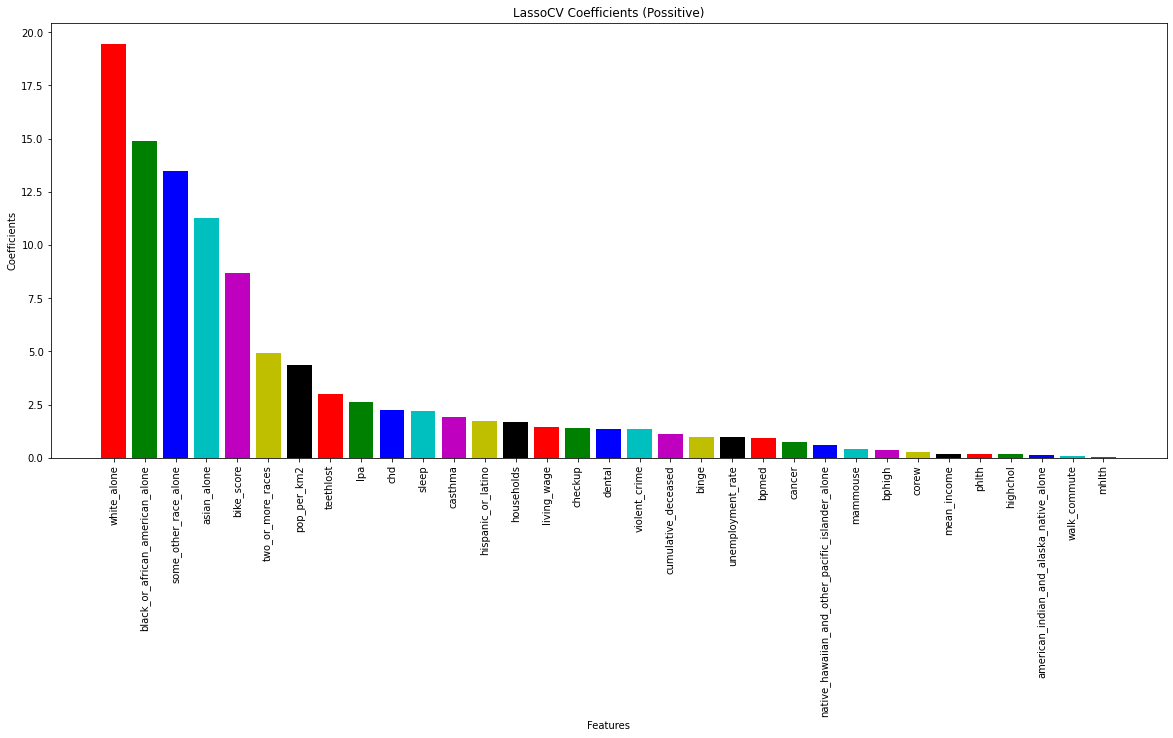

In [124]:
# Create a list of feature importance tuples for only positive coefficients 
feature_importance = [(feature, coef) for feature, coef in sorted_feature_importance if coef > 0]

# Extract the features and coefficients into separate lists
features = [f[0] for f in feature_importance]
coefs = [f[1] for f in feature_importance]

# Create a figure with width=12 inches and height=8 inches
plt.figure(figsize=(20,8))

# Create a bar plot of the feature importance with different colors for each feature
plt.bar(features, coefs, color=['r','g','b','c','m','y','k'])

plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("LassoCV Coefficients (Possitive)")
plt.xticks(rotation=90)
plt.show()
